In [1]:
import math
import statsmodels.formula.api as smf
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
from datetime import datetime
from scipy import stats
from IPython.display import IFrame
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'  # 默认为'last'
plt.rcParams['font.sans-serif'] = ['Microsoft Yahei']
plt.style.use("ggplot")
%matplotlib inline

<div class="jumbotron">
    <h1 class="display-1">数据与探索</h1>
    <hr class="my-4">
    <p>主讲：李岩</p>
    <p>管理学院</p>
    <p>liyan@cumtb.edu.cn</p>
</div>

## 数据（Data）

### 定义 

<dl class="row alert alert-info">
    <dt class="col-md-1">数据</dt>
    <dd class="col-md-11">对象（objects）与它们属性（attributes）的集合。</dd>
</dl>

<center><img src="./img/explore/data.svg" width=100%></center>

<dl class="row alert alert-danger">
    <dt class="col-md-1">属性</dt>
    <dd class="col-md-11">对象的特性（characteristic）或性质（property）。</dd>
</dl>

- 通常也被称作*变量（variable）*、*字段（field）*、*维度（dimension）*、*特征（feature）*

<dl class="row alert alert-info">
    <dt class="col-md-4">对象</dt>
    <dd class="col-md-8">属性的集合</dt>
</dl>

- 通常也被称为*记录（record）*、*点（point）*、*样本（sample）*、*实例（instance）*、*案例（case）*、*实体（entity）* 

### 属性的类型

- 属性的类型取决于该属性的数值具备下列哪些性质
    + **相异性**（distinctness）：$=$ 和 $\ne$
    + **序**（order）：$\lt$，$\le$，$\gt$ 和 $\ge$
    + **有意义的差**（meaningful differences）：$+$ 和 $-$
    + **有意义的比率**（meaningful ratios）：$\times$ 和 $/$

属性类型|特点|包含的性质|示例|适合的统计量
---|---|---|---|---
标称（nominal）|仅仅是名称|相异性|名字、班级、颜色|众数
序数（ordinal）|具有自然排序|相异性、序|年级、等级|众数、中位数
区间（interval）|没有绝对零点、等间隔|相异性、序、有意义的差|温度、日期、IQ|众数、中位数、均值、方差
比率（ratio）|有绝对零点|相异性、序、有意义的差、有意义的比率|距离、重量、收入|众数、中位数、均值、方差、几何均值

ID|工作状况|教育水平|居住年限|信用状况
---|---|---|---|---
1|就业|研究生|5|好
2|就业|高中|2|差
3|失业|本科生|1|差
4|就业|高中|10|好

- ID: 标称

- 工作状况：标称

- 教育水平：序数

- 居住年限：比率

- 信用状况：序数

## 数据变换

<p class="alert alert-danger">对数据进行规范化处理，构成一个适合数据挖掘的描述形式。</p>

<center><img src="./img/explore/dataTransform.svg" width=80%></center>

## 数据规约

<p class="alert alert-warning">减小数据集容量，但仍接近保持原数据的完整性。</p>

<center><img src="./img/explore/dataReduction.svg" width=80%></center>

### 记录数量的降低

- 数据立方体存储多维聚集信息
    + 按照属性的多个概念分层将数据聚集，用聚集后的数据展开分析
    + 例，对产品销售额按照城市、省、区域等聚集分析

<center><img src="./img/explore/dataCuboid.svg" width=100%></center>

<center><img src="./img/explore/dataAgg.svg" width=80%></center>

### 属性数值的数量降低

- 数值规约
    + 用替代的、较小的数据来减少数据量
    + 例，回归模型用回归参数代替原始数据
    + 例，构建直方图，利用属性数值的分布划分类型

- 概念分层
    + 将标称数据泛化到更抽象的概念层
    + 例，将班级抽象到专业

### 属性数量的减少

- 属性子集选择
    + 从众多属性中选出与分析挖掘任务相关的最小属性集合

<p class="h3 display-1 text-danger"><ins>顾客在线购买预测</ins></p>

顾客ID|页面1|页面2|页面3|...|页面1000|买书？
---|---|---|---|---|---|---
cus001|1|3|1|...|1|是
cus002|2|1|0|...|2|是
cus003|2|0|0|...|0|否
...|...|...|...|...|...|...

只需要保留与买书相关的页面、订单页面，其他页面是无关信息

- 维度规约
    + 将现有数据降低到更小的维度
    + 例，主成分分析方法，将大量相关属性转变成为少量不相关的变量（即主成分）

<p class="h3 display-1 text-danger"><ins>能否用少量指标表示公司的财务绩效？</ins></p>

公司|销售净利率|资产净利率|净资产收益率|销售毛利率
---|---|---|---|---
歌华有线|43.31|7.39|8.73|54.89
五粮液|17.11|12.13|17.29|44.25
用友软件|21.11|6.03|7.00|89.37
...|...|...|...|...

## 数据的相异性

- 相异度（dissimilarity）：两个数据对象差异程度的数值度量
    + 也被称为**距离**(distance)

<img src="./img/pandas/dissimilarity.gv.svg" width=200%>

### 数据对象之间的相异度度量

#### 欧几里得距离（Euclidean distance）

- $n$维空间中两个点$\boldsymbol{x}$和$\boldsymbol{y}$之间的欧几里得距离是

$$
d(\boldsymbol{x}, \boldsymbol{y}) = \sqrt{\sum_{k=1}^n(x_k-y_k)^2}
$$

#### 闵可夫斯基距离（Minkowski distance）

$$
d(\boldsymbol{x}, \boldsymbol{y})=\left(\sum_{k=1}^n|x_k-y_k|^r\right)^{\frac{1}{r}}
$$

其中，$r=1, 2, \cdots, \infty$

#### 距离的性质

- 非负性
    + $\forall \boldsymbol{x}, \boldsymbol{y}$，$d(\boldsymbol{x}, \boldsymbol{y})\ge 0$
    + $\boldsymbol{x}=\boldsymbol{y}\iff d(\boldsymbol{x}, \boldsymbol{y})=0$
- 对称性：$\forall \boldsymbol{x}, \boldsymbol{y}$，$d(\boldsymbol{x}, \boldsymbol{y})=d(\boldsymbol{y}, \boldsymbol{x})$
- 三角不等式：$\forall \boldsymbol{x}, \boldsymbol{y}, \boldsymbol{z}$，$d(\boldsymbol{x}, \boldsymbol{z})\le d(\boldsymbol{x}, \boldsymbol{y})+d(\boldsymbol{y}, \boldsymbol{z})$

### 距离的应用

- 根据观影者对电影的评分数据，分析观影者之间的相异度

In [3]:
critics = {
    'Lisa Rose': {
        'Lady in the Water': 2.5,
        'Snakes on a Plane': 3.5,
        'Just My Luck': 3.0,
        'Superman Returns': 3.5,
        'You, Me, and Dupree': 2.5,
        'The Night Listener': 3.0
    },
    'Gene Seymour': {
        'Lady in the Water': 3.0,
        'Snakes on a Plane': 3.5,
        'Just My Luck': 1.5,
        'Superman Returns': 5.0,
        'You, Me, and Dupree': 3.0,
        'The Night Listener': 3.5
    },
    'Michael Phillips': {
        'Lady in the Water': 2.5,
        'Snakes on a Plane': 3.0,
        'Superman Returns': 3.5,
        'The Night Listener': 4.0
    },
    'Claudia Puig': {
        'Lady in the Water': 2.5,
        'Snakes on a Plane': 3.0,
        'Superman Returns': 4.0,
        'You, Me, and Dupree': 2.5,
        'The Night Listener': 4.5
    },
    'Mick LaSalle': {
        'Lady in the Water': 3.0,
        'Snakes on a Plane': 4.0,
        'Just My Luck': 2.0,
        'Superman Returns': 3.0,
        'You, Me, and Dupree': 2.0,
        'The Night Listener': 3.0
    },
    'Jack Mathews': {
        'Lady in the Water': 3.0,
        'Snakes on a Plane': 4.0,
        'Superman Returns': 5.0,
        'You, Me, and Dupree': 3.5,
        'The Night Listener': 3.0
    },
    'Toby': {
        'Snakes on a Plane': 4.5,
        'Superman Returns': 4.0,
        'You, Me, and Dupree': 1.0,
    }
}
tmp = pd.DataFrame(critics)
print(tmp)

                     Lisa Rose  Gene Seymour  Michael Phillips  Claudia Puig  \
Lady in the Water          2.5           3.0               2.5           2.5   
Snakes on a Plane          3.5           3.5               3.0           3.0   
Just My Luck               3.0           1.5               NaN           NaN   
Superman Returns           3.5           5.0               3.5           4.0   
You, Me, and Dupree        2.5           3.0               NaN           2.5   
The Night Listener         3.0           3.5               4.0           4.5   

                     Mick LaSalle  Jack Mathews  Toby  
Lady in the Water             3.0           3.0   NaN  
Snakes on a Plane             4.0           4.0   4.5  
Just My Luck                  2.0           NaN   NaN  
Superman Returns              3.0           5.0   4.0  
You, Me, and Dupree           2.0           3.5   1.0  
The Night Listener            3.0           3.0   NaN  


In [52]:
def sim_distance(data, per1, per2):
    si = [item for item in data[per1] if item in data[per2]]
    if len(si) <= 0:
        return 0
    else:
        sumOfSquares =sum( [pow(data[per1][item]-data[per2][item], 2) for item in si])
    return 1/(1+math.sqrt(sumOfSquares))

sim_distance(critics, 'Lisa Rose', 'Jack Mathews')

0.3405424265831667

## 数据描述性分析

### 数据基本描述

<center><img src="./img/analysis/chipotle.jpg" width=60%></center>

#### 将数据集存入一个名为chipo的数据框内

In [4]:
chipo = pd.read_csv('./data/analysis/chipotle.csv')

#### 查看前10行内容

In [5]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


#### 数据集中有多少个列(columns)

In [6]:
chipo.shape[1]

5

#### 显示全部列名

In [7]:
chipo.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

#### 显示数据集的索引

In [8]:
chipo.index

RangeIndex(start=0, stop=4622, step=1)

#### 顾客最爱点哪个商品（item)？

In [9]:
ordered = chipo.groupby(by='item_name').agg({'quantity': 'sum'})
ordered.head()
# sorted(ordered['quantity'])
ordered.sort_values(by='quantity', ascending=False)

,quantity
item_name,
6 Pack Soft Drink,55
Barbacoa Bowl,66
Barbacoa Burrito,91
Barbacoa Crispy Tacos,12
Barbacoa Salad Bowl,10


,quantity
item_name,
Chicken Bowl,761
Chicken Burrito,591
Chips and Guacamole,506
Steak Burrito,386
Canned Soft Drink,351
Chips,230
Steak Bowl,221
Bottled Water,211
Chips and Fresh Tomato Salsa,130


##### DataFrame对值排序
```python
DataFrame.sort_values(by, axis=0, ascending=True, inplace=False)
```
- `by`：`str`或者`list of str`

#### 顾客总共买了多少种商品（item)？

In [10]:
ordered.shape[0]

50

#### 下单总量是多少？

In [11]:
ordered['quantity'].sum()

4972

#### 将item_price转换为浮点数(float)

In [12]:
chipo.head()
chipo['item_price'] = chipo['item_price'].map(lambda x: float(x[1:]))
chipo.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98


#### 在该数据集对应的时期内，该chipotle门店的收入是多少?

##### 新增一列`sub_total`计算每个order的收入

In [13]:
chipo['sub_total'] = chipo['item_price']*chipo['quantity']
chipo.head()

,order_id,quantity,item_name,choice_description,item_price,sub_total
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39,2.39
1,1,1,Izze,[Clementine],3.39,3.39
2,1,1,Nantucket Nectar,[Apple],3.39,3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98,33.96


##### 计算所有`sub_total`的总和

In [14]:
chipo['sub_total'].sum()

39237.02

#### 该chipotle门店一共有多少订单？

```python
Series.unique()
```
- 返回`Series`中的独特元素构成的数组

```python
Series.nunique(dropna=True)
```
- 计算`Series`中独特元素的个数，默认不计算空值

In [15]:
chipo['order_id'].nunique()

1834

#### 每一单(order)对应的平均总价是多少？

In [16]:
chipo.groupby(by='order_id').agg({'sub_total': 'sum'}).mean()

sub_total    21.394231
dtype: float64

## 数据业务模型

### RFM模型
<center><img src="./img/analysis/rfm.jfif" width=60%></center>

#### 读取数据

- 某个互联网电商一年内的销售数据

In [17]:
rfmDf = pd.read_csv('./data/analysis/rfm_sale.csv')
rfmDf.head()

,Unnamed: 0,USERID,ORDERDATE,ORDERID,AMOUNTINFO
0,0,142074,2018-01-01,4196439032,9399.0
1,1,56927,2018-01-01,4198324983,8799.0
2,2,87058,2018-01-01,4191287379,6899.0
3,3,136104,2018-01-01,4198508313,5999.0
4,4,117831,2018-01-01,4202238313,5399.0


In [18]:
rfmDf.dtypes

Unnamed: 0      int64
USERID          int64
ORDERDATE      object
ORDERID         int64
AMOUNTINFO    float64
dtype: object

- 删除无用列

In [19]:
del rfmDf['Unnamed: 0']

#### 重复数据判断与清理

In [20]:
rfmDf.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
76045    False
76046    False
76047    False
76048    False
76049    False
Length: 76050, dtype: bool

In [21]:
rfmDf.duplicated().value_counts()

False    76050
dtype: int64

- 没有重复记录

#### 缺失数据判断与清理

In [22]:
rfmNa = rfmDf.isna()
rfmNa

,USERID,ORDERDATE,ORDERID,AMOUNTINFO
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
76045,False,False,False,False
76046,False,False,False,False
76047,False,False,False,False
76048,False,False,False,False


##### 显示含有缺失值的行

In [23]:
rfmNa.any(axis=1)

0        False
1        False
2        False
3        False
4        False
         ...  
76045    False
76046    False
76047    False
76048    False
76049    False
Length: 76050, dtype: bool

- `DataFrame.any(axis=0)`：沿着纵向（`axis=0`)或横向（`axis=1`）的方向是否有元素是`True`

In [24]:
df = pd.DataFrame({"A": [1, 2], "B": [0, 2], "C": [0, 0]})
df
df.any()
df.any(axis=1)

,A,B,C
0,1,0,0
1,2,2,0


A     True
B     True
C    False
dtype: bool

0    True
1    True
dtype: bool

In [25]:
rfmDf.loc[rfmNa.values.any(axis=1)]

,USERID,ORDERDATE,ORDERID,AMOUNTINFO
20,75849,2018-01-01,4197103430,NaN
72,103714,NaN,4136159682,189.0
114,155209,2018-01-01,4177940815,NaN
229,139877,NaN,4111956196,6.3
233,54599,2018-01-01,4119525205,NaN
260,65456,2018-01-02,4195643356,NaN
56387,122134,2018-09-21,3826649773,NaN
63260,116995,2018-10-24,3981569421,NaN
71201,98888,2018-12-06,3814398698,NaN


##### 删除缺失行

In [26]:
rfmDf.dropna(how='any', axis=0, inplace=True)

In [27]:
rfmDf.shape

(76041, 4)

#### 可视化消费金额

<AxesSubplot:ylabel='Frequency'>

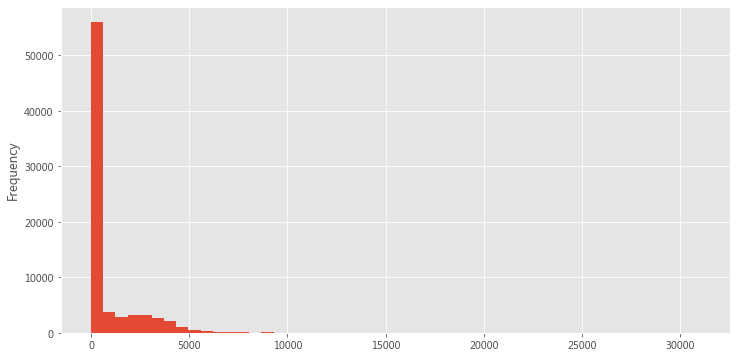

In [28]:
rfmDf['AMOUNTINFO'].plot(kind='hist', bins=50, figsize=(12, 6))

- 消费金额的基本信息

In [29]:
rfmDf['AMOUNTINFO'].describe()

count    76041.000000
mean       777.301443
std       1448.300325
min          0.500000
25%         12.500000
50%         65.000000
75%        790.000000
max      30999.000000
Name: AMOUNTINFO, dtype: float64

- 没有金额小于0，不需要进行异常处理

#### 将`ORDERDATE`转变为日期型数据

In [30]:
rfmDf['ORDERDATE'] = pd.to_datetime(rfmDf['ORDERDATE'])

In [31]:
rfmDf.dtypes

USERID                 int64
ORDERDATE     datetime64[ns]
ORDERID                int64
AMOUNTINFO           float64
dtype: object

##### 增加一列计算`ORDERDATE`距离今天的间隔

In [32]:
pd.to_datetime('today')-rfmDf['ORDERDATE']

0       2364 days 22:12:40.240763
1       2364 days 22:12:40.240763
2       2364 days 22:12:40.240763
3       2364 days 22:12:40.240763
4       2364 days 22:12:40.240763
                   ...           
76045   2002 days 22:12:40.240763
76046   2002 days 22:12:40.240763
76047   2002 days 22:12:40.240763
76048   2002 days 22:12:40.240763
76049   2002 days 22:12:40.240763
Name: ORDERDATE, Length: 76041, dtype: timedelta64[ns]

In [33]:
rfmDf['INTERVAL'] = (pd.to_datetime('today')-rfmDf['ORDERDATE']).dt.days

In [34]:
rfmDf.head()

,USERID,ORDERDATE,ORDERID,AMOUNTINFO,INTERVAL
0,142074,2018-01-01,4196439032,9399.0,2364
1,56927,2018-01-01,4198324983,8799.0,2364
2,87058,2018-01-01,4191287379,6899.0,2364
3,136104,2018-01-01,4198508313,5999.0,2364
4,117831,2018-01-01,4202238313,5399.0,2364


#### 计算R、F、M值

##### 计算最近一次消费

In [35]:
rDf = rfmDf.groupby(by='USERID', sort=False).agg({'INTERVAL': 'min'})
rDf.head()

,INTERVAL
USERID,
142074,2359
56927,2027
87058,2226
136104,2364
117831,2364


##### 计算年消费频次

In [36]:
fDf = rfmDf.groupby(by='USERID', sort=False).agg({'USERID': 'count'})
fDf.head()

,USERID
USERID,
142074,2
56927,2
87058,2
136104,1
117831,1


##### 计算年消费金额

In [37]:
mDf = rfmDf.groupby(by='USERID', sort=False).agg({'AMOUNTINFO': 'sum'})
mDf.head()

,AMOUNTINFO
USERID,
142074,9408.9
56927,8826.9
87058,11898.0
136104,5999.0
117831,5399.0


##### 将上述三个表合并成一个表

In [38]:
totDf = pd.concat([rDf, fDf, mDf], axis=1, join='inner')
totDf.head()

,INTERVAL,USERID,AMOUNTINFO
USERID,,,
142074,2359,2,9408.9
56927,2027,2,8826.9
87058,2226,2,11898.0
136104,2364,1,5999.0
117831,2364,1,5399.0


In [39]:
tmp = rDf.merge(fDf, left_index=True, right_index=True)
tmp.head()

,INTERVAL,USERID
USERID,,
142074,2359,2
56927,2027,2
87058,2226,2
136104,2364,1
117831,2364,1


In [40]:
totDf = tmp.merge(mDf, left_index=True, right_index=True)
totDf.head()

,INTERVAL,USERID,AMOUNTINFO
USERID,,,
142074,2359,2,9408.9
56927,2027,2,8826.9
87058,2226,2,11898.0
136104,2364,1,5999.0
117831,2364,1,5399.0


##### 更改列名

In [41]:
totDf.columns = ['最近一次消费间隔', '年消费次数', '年消费金额']
totDf.head()

,最近一次消费间隔,年消费次数,年消费金额
USERID,,,
142074,2359,2,9408.9
56927,2027,2,8826.9
87058,2226,2,11898.0
136104,2364,1,5999.0
117831,2364,1,5399.0


##### 对R、F、M打分

- 均使用$1\sim5$打分
- 最近一次消费间隔越大，分值越小
- 年消费次数越大，分值越大
- 年消费金额越大，分值越大
- 将各个维度的分值作为新列接在原数据表上

<AxesSubplot:ylabel='Frequency'>

<AxesSubplot:ylabel='Frequency'>

<AxesSubplot:ylabel='Frequency'>

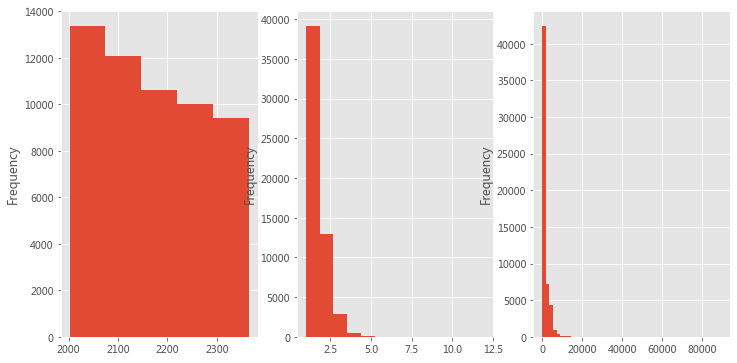

In [42]:
fig, ax = plt.subplots(1, 3, figsize=(12, 6))
totDf['最近一次消费间隔'].plot(kind='hist', bins=5, ax=ax[0])
totDf['年消费次数'].plot(kind='hist', bins=13, ax=ax[1])
totDf['年消费金额'].plot(kind='hist', bins=50, ax=ax[2])

In [43]:
pd.qcut(totDf['最近一次消费间隔'], q=5)
pd.qcut(totDf['年消费金额'], q=5)

USERID
142074      (2279.0, 2364.0]
56927     (2001.999, 2060.0]
87058       (2199.0, 2279.0]
136104      (2279.0, 2364.0]
117831      (2279.0, 2364.0]
                 ...        
154947    (2001.999, 2060.0]
66477     (2001.999, 2060.0]
140056    (2001.999, 2060.0]
51680     (2001.999, 2060.0]
109535    (2001.999, 2060.0]
Name: 最近一次消费间隔, Length: 55540, dtype: category
Categories (5, interval[float64]): [(2001.999, 2060.0] < (2060.0, 2127.6] < (2127.6, 2199.0] < (2199.0, 2279.0] < (2279.0, 2364.0]]

USERID
142074    (2286.0, 89566.9]
56927     (2286.0, 89566.9]
87058     (2286.0, 89566.9]
136104    (2286.0, 89566.9]
117831    (2286.0, 89566.9]
                ...        
154947        (0.499, 14.9]
66477         (0.499, 14.9]
140056        (0.499, 14.9]
51680         (0.499, 14.9]
109535        (0.499, 14.9]
Name: 年消费金额, Length: 55540, dtype: category
Categories (5, interval[float64]): [(0.499, 14.9] < (14.9, 61.9] < (61.9, 299.0] < (299.0, 2286.0] < (2286.0, 89566.9]]

In [44]:
totDf['年消费次数'].value_counts()

1     39130
2     12957
3      2887
4       506
5        54
6         5
12        1
Name: 年消费次数, dtype: int64

- 消费次数不同数值过少，不适宜用分位数分类，手动设定分类区间

In [45]:
pd.cut(totDf['年消费次数'], bins=[0, 1, 2, 3, 5, 12])

USERID
142074    (1, 2]
56927     (1, 2]
87058     (1, 2]
136104    (0, 1]
117831    (0, 1]
           ...  
154947    (0, 1]
66477     (0, 1]
140056    (0, 1]
51680     (0, 1]
109535    (0, 1]
Name: 年消费次数, Length: 55540, dtype: category
Categories (5, interval[int64]): [(0, 1] < (1, 2] < (2, 3] < (3, 5] < (5, 12]]

In [46]:
totDf['R'] = pd.qcut(totDf['最近一次消费间隔'], q=5, labels=range(5, 0, -1))
totDf['F'] = pd.cut(totDf['年消费次数'], bins=[
                    0, 1, 2, 3, 5, 12], labels=range(1, 6, 1))
totDf['M'] = pd.qcut(totDf['年消费金额'], q=5, labels=range(1, 6, 1))
totDf.head()

,最近一次消费间隔,年消费次数,年消费金额,R,F,M
USERID,,,,,,
142074,2359,2,9408.9,1,2,5
56927,2027,2,8826.9,5,2,5
87058,2226,2,11898.0,2,2,5
136104,2364,1,5999.0,1,1,5
117831,2364,1,5399.0,1,1,5


#### 计算RFM总值

##### 新建立一列记录RFM总值
$$
RFM = 100\times R + 10\times F + 1\times M
$$

In [47]:
totDf['RFM'] = 100*np.array(totDf['R'])+10 * \
    np.array(totDf['F'])+np.array(totDf['M'])
totDf.head()

,最近一次消费间隔,年消费次数,年消费金额,R,F,M,RFM
USERID,,,,,,,
142074,2359,2,9408.9,1,2,5,125
56927,2027,2,8826.9,5,2,5,525
87058,2226,2,11898.0,2,2,5,225
136104,2364,1,5999.0,1,1,5,115
117831,2364,1,5399.0,1,1,5,115


- 由于`Series`不能直接运行算术运算，所以先把每一列变成`Numpy`的数组`array`，方法是`np.array(Series)`

##### 分类客户

In [48]:
cLabels = ['流失客户', '一般维持客户', '新客户', '潜力客户',
           '重要挽留客户', '重要深耕客户', '重要唤回客户', '重要价值客户']
pd.cut(totDf['RFM'], bins=8, labels=cLabels)

USERID
142074      流失客户
56927     重要价值客户
87058        新客户
136104      流失客户
117831      流失客户
           ...  
154947    重要价值客户
66477     重要价值客户
140056    重要价值客户
51680     重要价值客户
109535    重要价值客户
Name: RFM, Length: 55540, dtype: category
Categories (8, object): ['流失客户' < '一般维持客户' < '新客户' < '潜力客户' < '重要挽留客户' < '重要深耕客户' < '重要唤回客户' < '重要价值客户']

In [49]:
totDf['Label'] = pd.cut(totDf['RFM'], bins=8, labels=cLabels)
totDf.head()

,最近一次消费间隔,年消费次数,年消费金额,R,F,M,RFM,Label
USERID,,,,,,,,
142074,2359,2,9408.9,1,2,5,125,流失客户
56927,2027,2,8826.9,5,2,5,525,重要价值客户
87058,2226,2,11898.0,2,2,5,225,新客户
136104,2364,1,5999.0,1,1,5,115,流失客户
117831,2364,1,5399.0,1,1,5,115,流失客户


#### 可视化各类客户比例

<AxesSubplot:ylabel='Label'>

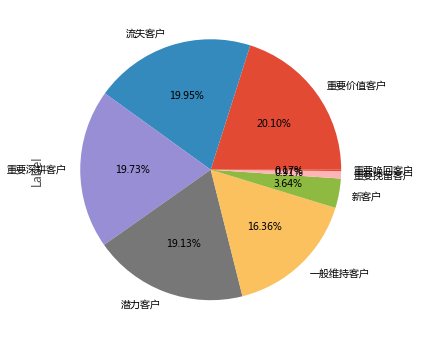

In [50]:
totDf['Label'].value_counts().plot(kind='pie', figsize=(12, 6), autopct='%.2f%%')

[Text(0.5, 0, '客户类型'), Text(0, 0.5, '金额')]

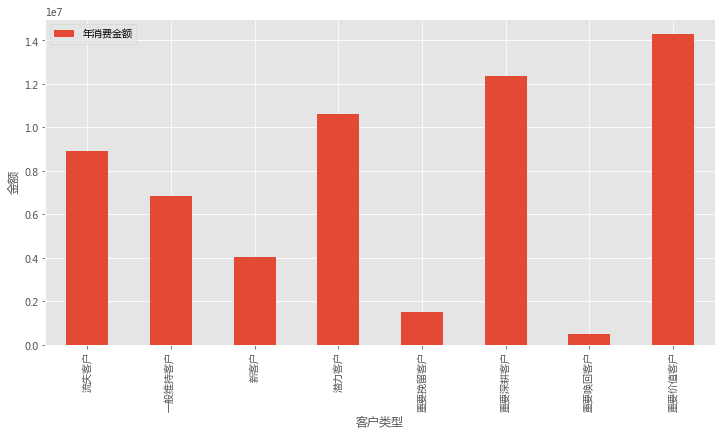

In [51]:
axRFM = totDf.groupby('Label').agg({'年消费金额': 'sum'}).plot(kind='bar', figsize=(12, 6))
axRFM.set(xlabel='客户类型', ylabel='金额')